In [1]:
import tensorflow as tf
print("Version of tensorflow is : " , tf.__version__)

Version of tensorflow is :  2.1.0


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
MODEL = tf.keras.models.load_model("augmentedmodel.h5")

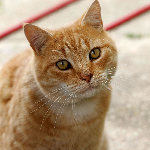

<PIL.Image.Image image mode=RGB size=150x150 at 0x1ADF1F6C630>


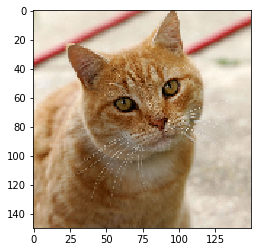

(150, 150, 3)
(1, 150, 150, 3)


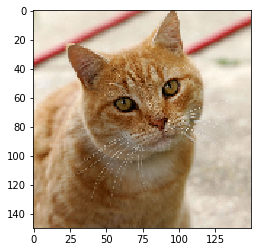

In [14]:
import numpy as np
img = tf.keras.preprocessing.image.load_img("./Cat03.jpg" , target_size=(150 , 150))
print(img)
img = tf.keras.preprocessing.image.img_to_array(img)
img = img / 255
plt.imshow(img)
plt.show()
print(img.shape)
img_ = img[np.newaxis , ]
print(img_.shape)
plt.imshow(img_[0])

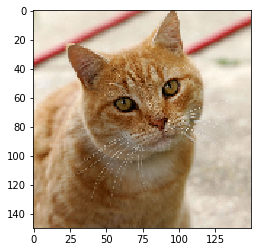

In [15]:
plt.imshow(img_[0])

In [19]:
last_output = [layer.output for layer in MODEL.layers[:8]]

In [20]:
len(last_output)

8

In [21]:
model = tf.keras.models.Model(
    inputs  = MODEL.input,
    outputs = last_output
)

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0     

In [23]:
pred = model.predict(img_)

In [25]:
print("Shape of prediction : " , len(pred))

Shape of prediction :  8


In [26]:
for l in pred:
    print("layers output shape : " , l.shape)

layers output shape :  (1, 148, 148, 32)
layers output shape :  (1, 74, 74, 32)
layers output shape :  (1, 72, 72, 64)
layers output shape :  (1, 36, 36, 64)
layers output shape :  (1, 34, 34, 128)
layers output shape :  (1, 17, 17, 128)
layers output shape :  (1, 15, 15, 128)
layers output shape :  (1, 7, 7, 128)


In [27]:
layer_name = [layer.name for layer in MODEL.layers]

In [28]:
layer_name

['conv2d',
 'max_pooling2d',
 'conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'max_pooling2d_2',
 'conv2d_3',
 'max_pooling2d_3',
 'flatten',
 'dense',
 'dense_1']

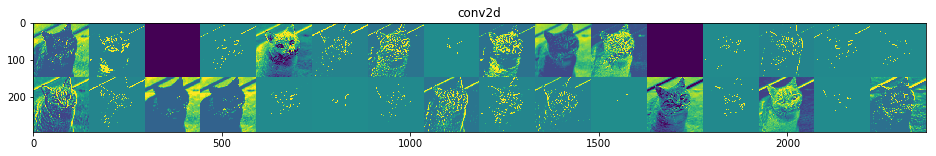

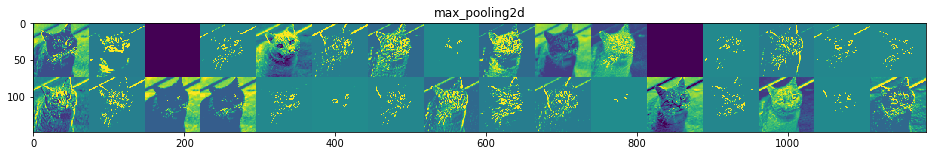

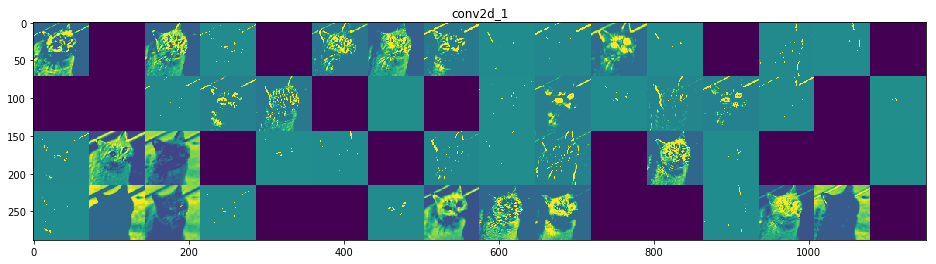

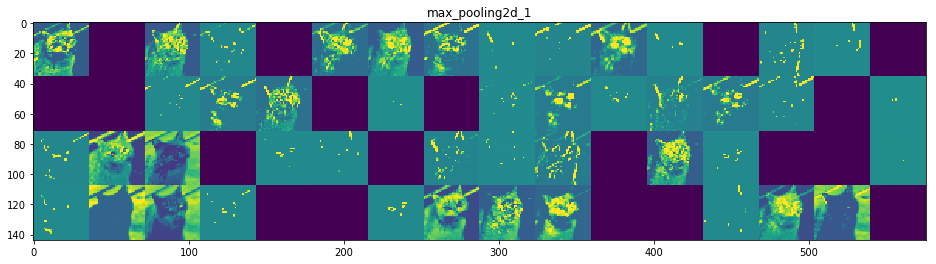

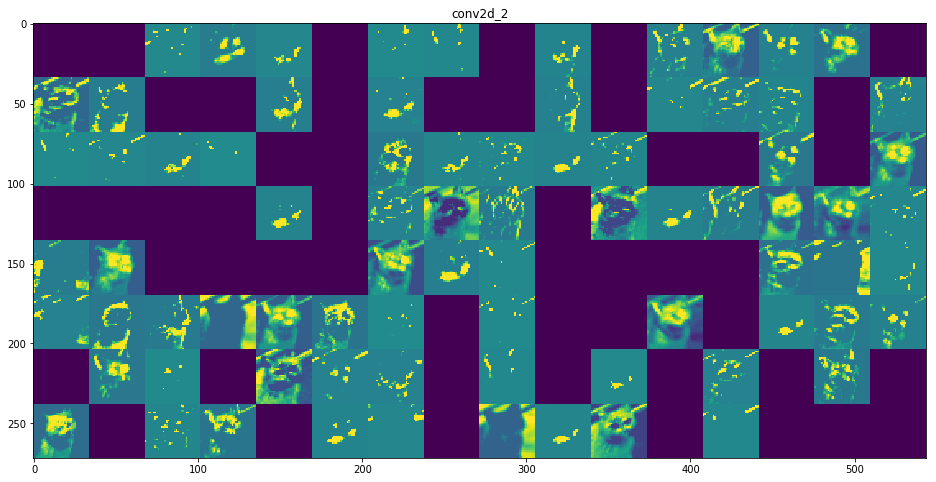

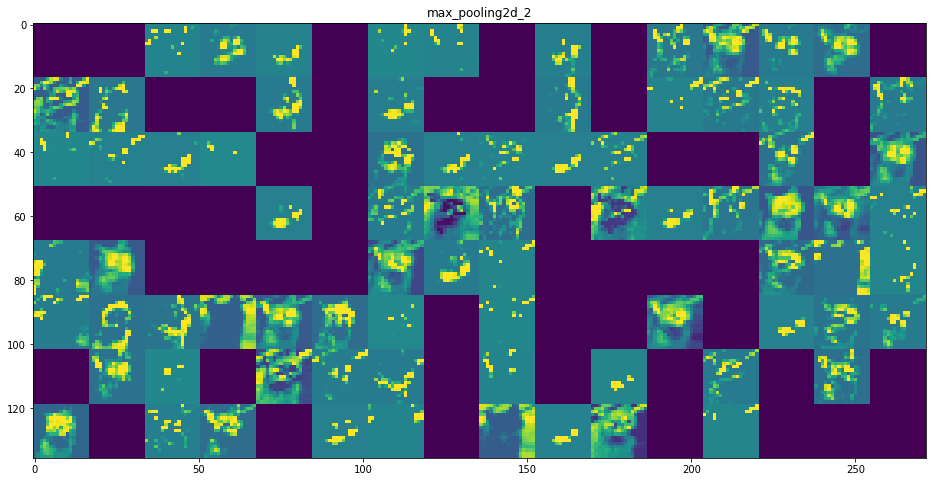

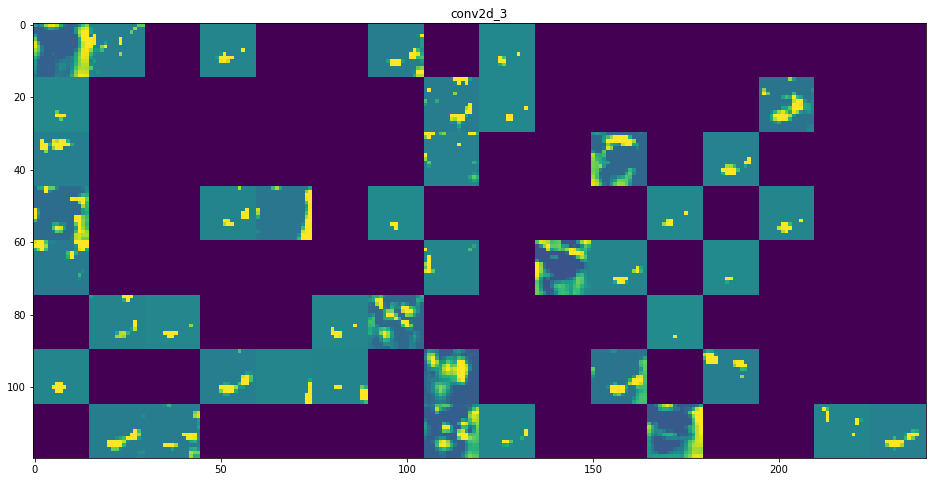

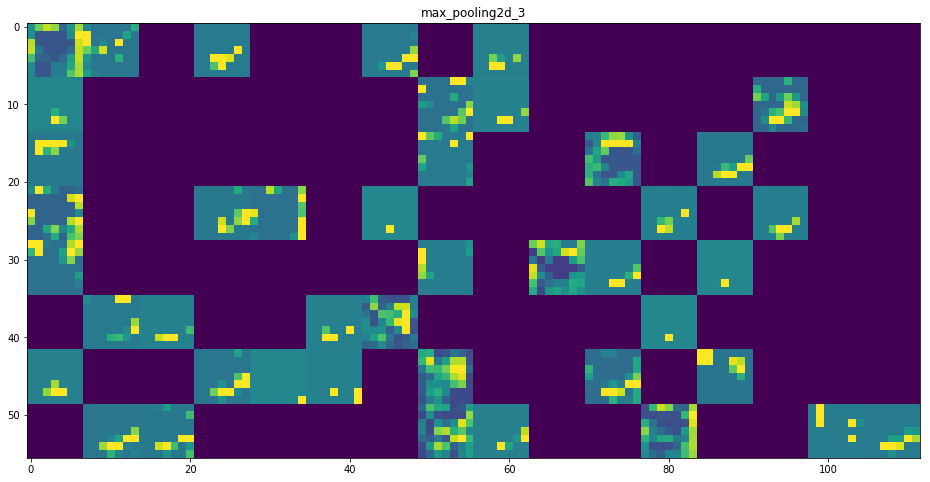

In [36]:
for name , output in zip(layer_name , pred):
    #print("Layer name => ",name)
    #print("Shape of the output for this layer : ", output.shape,"\n")
    now_col = 16
    now_row = output.shape[-1] // 16
    size = output.shape[1]
    canvas = np.zeros((size * now_row , size * now_col))
    for row in range(now_row):
        for col in range(now_col):
            img_no = now_col*row + col
            pic = output[0,:,:,img_no]
            pic -= pic.mean()
            pic /= pic.std()
            pic *= 64
            pic += 128
            pic = np.clip(pic, 0, 255).astype('uint8')
            canvas[ row*size : (row+1)*size , col*size : (col+1)*size] = pic
    
    scale = 1. / size
    plt.figure(figsize=(scale * canvas.shape[1] , scale * canvas.shape[0]))
    plt.title(name)
    plt.grid(False)
    plt.imshow(canvas, aspect='auto', cmap='viridis')